In [ ]:
# Importer les bibliothèque necessaires pour le projet
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Importer le fichier depuis l'espace personel GITHUB 
! wget https://raw.githubusercontent.com/soufianeze/MachineLearning2/main/Speed_Dating_Data.csv

--2022-07-23 23:07:11--  https://raw.githubusercontent.com/soufianeze/MachineLearning2/main/Speed_Dating_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5192296 (5.0M) [text/plain]
Saving to: ‘Speed_Dating_Data.csv.4’

Speed_Dating_Data.c 100%[===================>]   4.95M  --.-KB/s    in 0.08s   

2022-07-23 23:07:11 (65.5 MB/s) - ‘Speed_Dating_Data.csv.4’ saved [5192296/5192296]



In [ ]:
df = pd.read_csv('Speed_Dating_Data.csv',sep=',',encoding = "cp1252")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


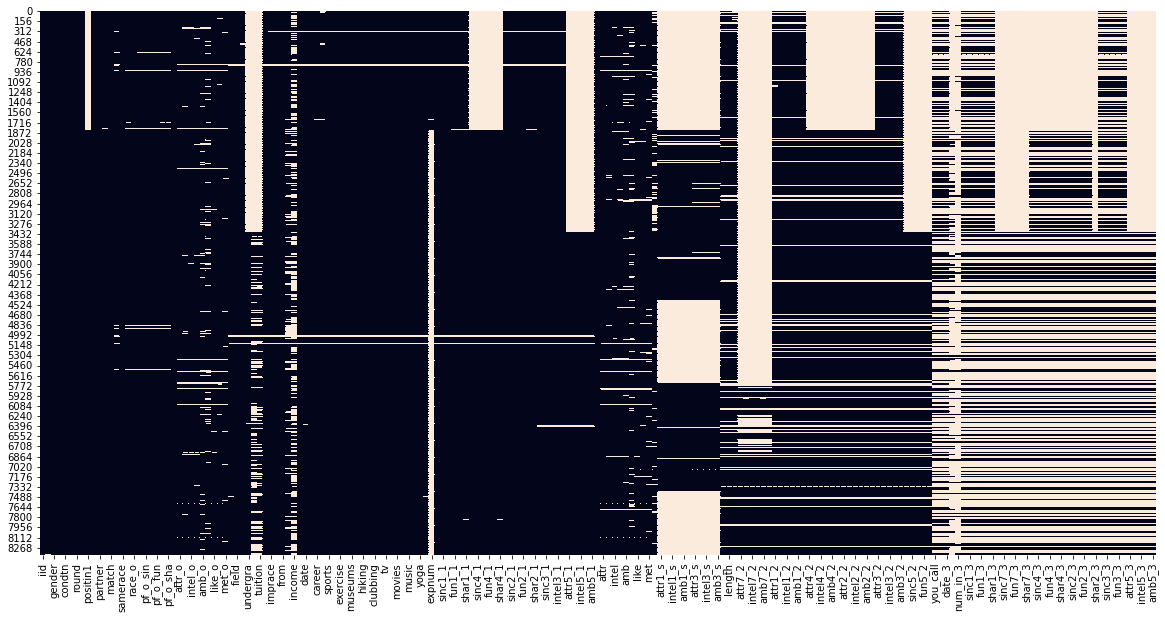

In [ ]:
#Positionnement des valeurs manquantes 
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False);

In [ ]:
# Dimension de la dataFrame
df.shape

(8378, 195)

#1.Data Cleaning

In [ ]:
columns = ['iid','age','gender','idg','pid','match','samerace','age_o','race_o','dec_o','field_cd','race','imprace','imprelig','from','goal','date','go_out','career_c','sports','tvsports','exercise',
'dining','museums','art','hiking','gaming','clubbing', 'reading','tv','theater','movies','concerts','music','shopping','yoga','dec','attr','sinc','intel','fun','amb','like','prob','met']

df = df[columns]

In [ ]:
# Suppression des valeurs manquantes 
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


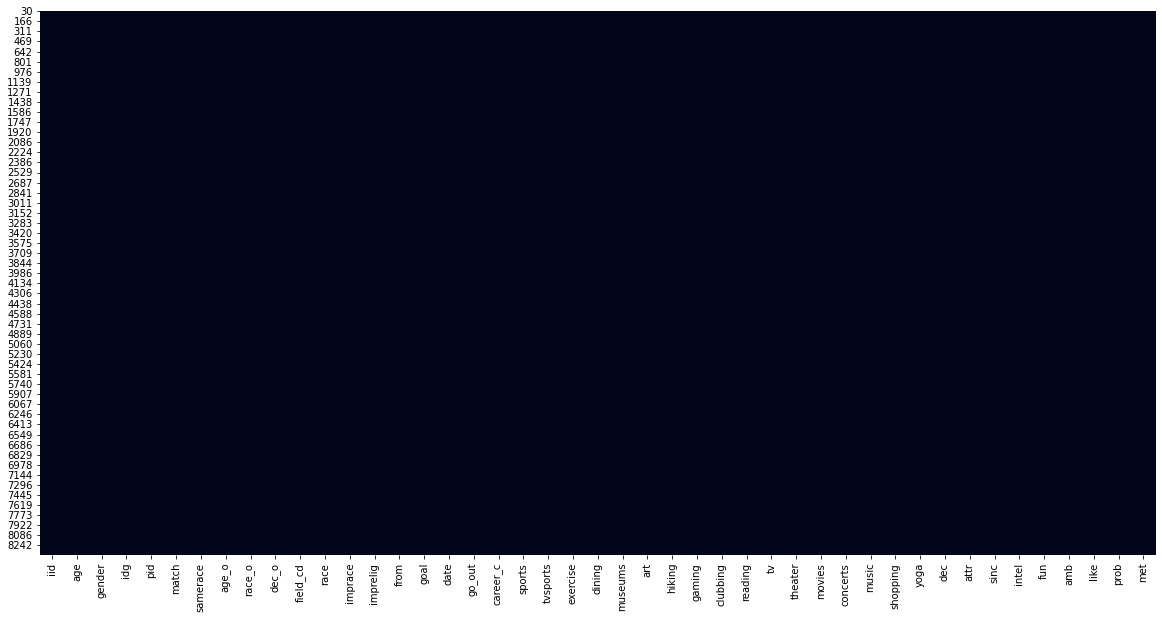

In [ ]:
#Positionnement des valeurs manquantes 
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False);

In [ ]:
# Dimension de la dataFrame
df.shape

(7065, 45)

In [ ]:
#  Traitement des données catégorielles
racedict = { 1 : 'black',
             2 : 'white',
             3 : 'latino',
             4 : 'asian',
             5 : 'native american',
             6 : 'other'}

def raceindex(n):
    if n < 1 or n > 6:
        return racedict[0]
    return racedict[n]

df['race'] = df['race'].apply(raceindex)
df['race_o'] = df['race_o'].apply(raceindex)

m = {0 : 'female', 1: 'male'}
df['gender'] = df['gender'].map(m)

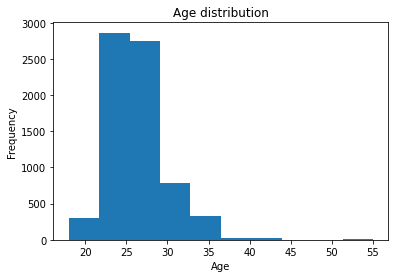

In [ ]:
# Distribution de l'âge des participants

age = df[np.isfinite(df['age'])]['age']
plt.hist(age.values)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency');

La Plupart des participant appartiennent à la tranche d'âge [20 - 35 ]

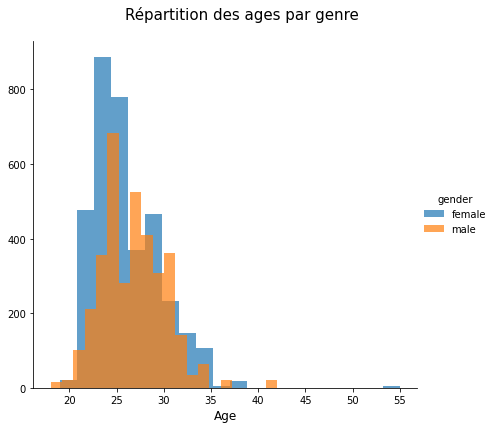

In [ ]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'age', alpha= 0.7, bins=20)
g.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Répartition des ages par genre', fontsize=15)
g.add_legend();

In [ ]:
df[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
             mean median   min   max count
gender                                    
female  25.992032   25.0  19.0  55.0  3514
male    26.620952   27.0  18.0  42.0  3551

On observe qu'il n'y a pas beaucoup de différence de l'âge entre les hommes et les femmes mais on peut dire que les femmes sont légèrement plus âgés lors de cet événement

In [ ]:
df['field_cd'] = df.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.',
                                 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
                                 10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
                                 14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'}).fillna(df.field_cd)
df.field_cd.value_counts(dropna=False)

Econ        1656
Nat. Sc.     905
Eng.         726
Pol. Sc.     609
Soc. Sc.     571
Law          552
Educ.        543
Soc. Wr.     403
Journ.       262
Hist.        191
Math         172
Arts         147
Med. Sc.     135
Film         114
Oth.          33
Lang.         26
Und.          10
Arch.         10
Name: field_cd, dtype: int64

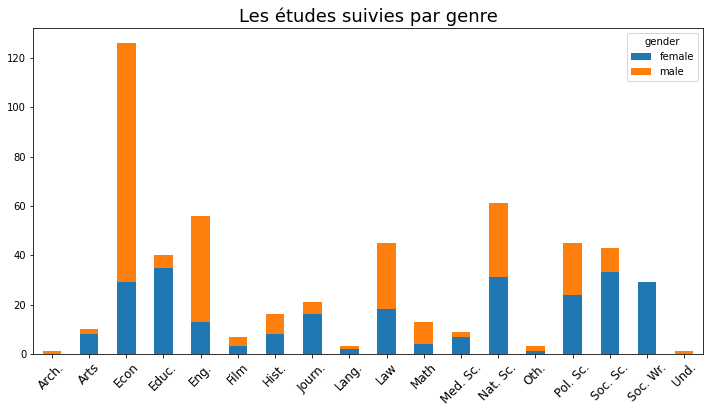

In [ ]:
tmp = df[['gender', 'field_cd']].groupby(['field_cd', 'gender']).size().unstack().fillna(0)
ax = tmp.plot(kind='bar', figsize=(12,6), stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Les études suivies par genre', fontsize=18)
ax.set_xlabel('',fontsize=1);

La majorité des participants ont fait des études d'économies et des sciences naturelles ainsi le domaine de l'ingénierie.

On constate aussi que ces domaines d'études sont dominés par les hommes

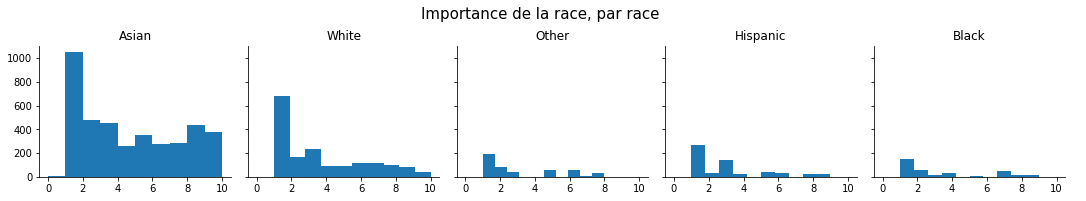

In [ ]:
# l'importance que la personne rencontrée soit de la même race par race
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprace', bins=10)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Importance de la race, par race', fontsize=15)
g.add_legend();

On constate que les participants de la race Asian et race White donnent beaucoup d'importance à la race 

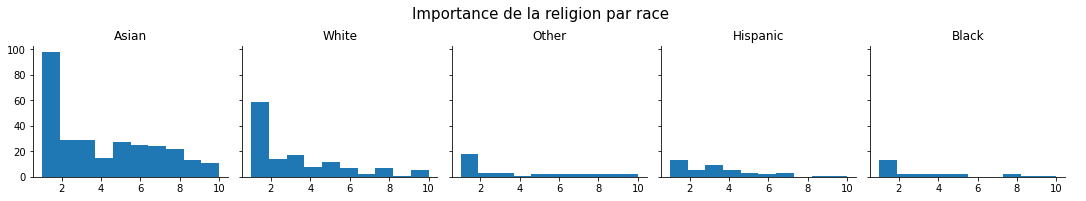

In [142]:
# l'importance que la personne rencontrée soit de la même religion par race
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprelig', bins=10)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Importance de la religion par race', fontsize=15)
g.add_legend();

On constate que les participants de la race Asian et race White donnent beaucoup d'importance à la religion 

In [ ]:
df['goal'] = df.goal.map({1: 'Fun', 2: 'Meet', 3: 'Date', 
                          4: 'Relationship', 5: 'IdidIt', 6: 'Other'}).fillna(df.goal)
df['goal'] = df.goal.map({1: 'Fun', 2: 'Meet', 3: 'Date', 
                          4: 'Relationship', 5: 'IdidIt', 6: 'Other'}).fillna(df.goal)
df.goal.value_counts(dropna=False)

Fun             223
Meet            183
Date             39
IdidIt           35
Other            28
Relationship     21
Name: goal, dtype: int64

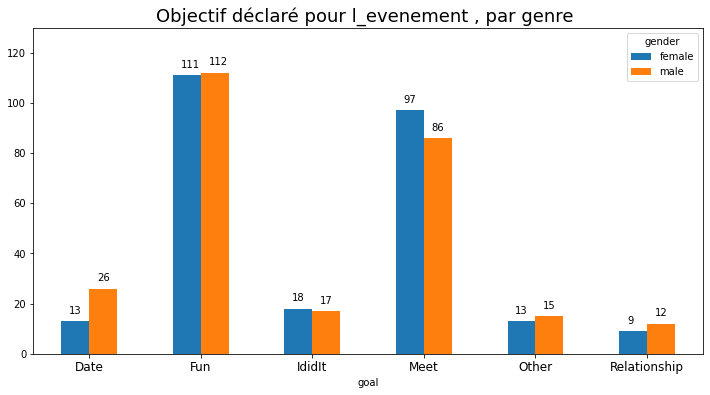

In [ ]:
tmp = df[['gender', 'goal']].groupby(['goal', 'gender']).size().unstack()
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,130))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_title('Objectif déclaré pour l_evenement , par genre ', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x()+.07, i.get_height()+3, \
            str(round((i.get_height()), 1)), fontsize=10)

La majorité des participants ont déclaré qui ont un objectif d'amusement ou de rencontre 

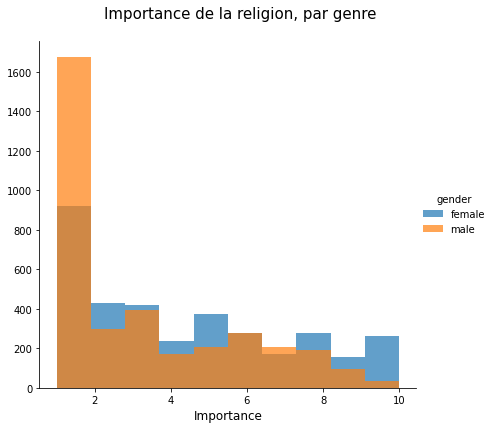

In [ ]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'imprelig', alpha= 0.7, bins=10)
g.set_xlabels('Importance', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Importance de la religion, par genre', fontsize=15)
g.add_legend();

Les femmes donnent plus d'importance à la religion que les hommes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


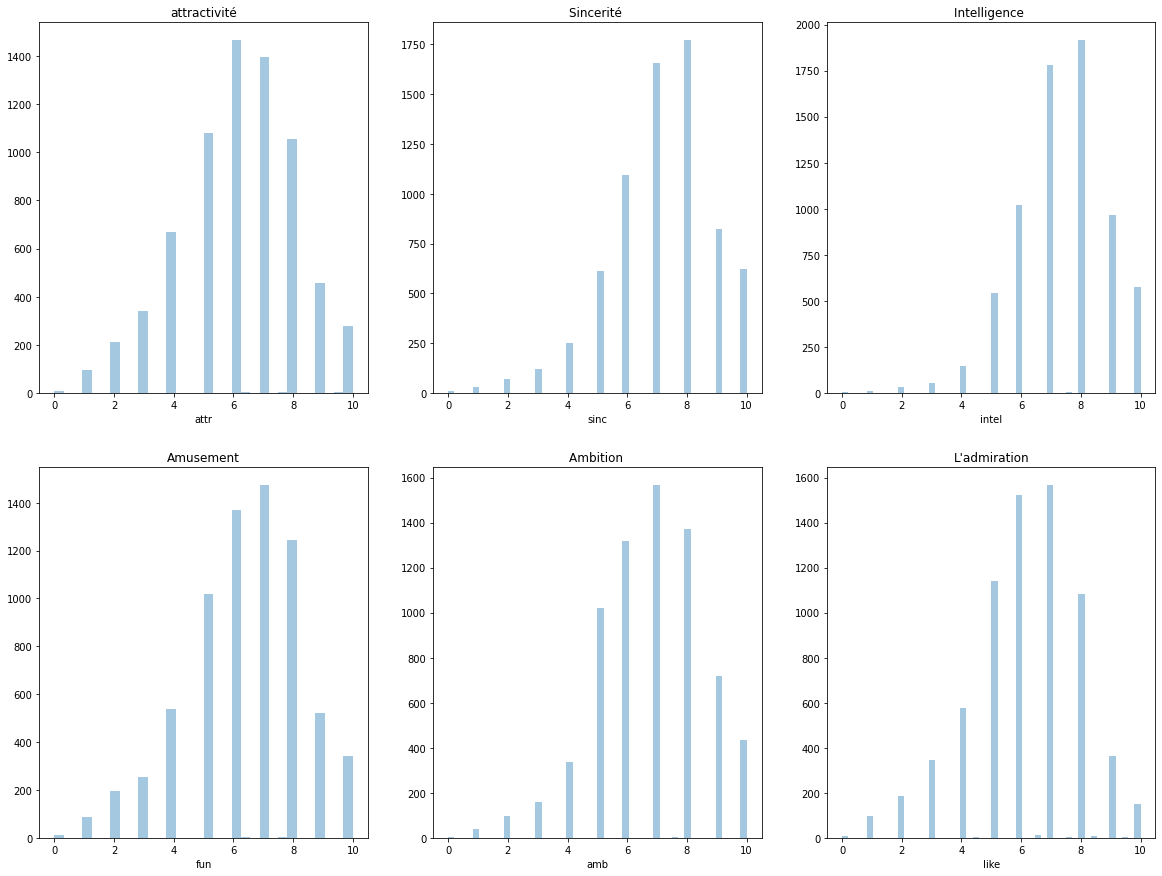

In [ ]:
# Distribution des scores pendant l'evenement 
fig, ax = plt.subplots(figsize=(20,15), ncols=3, nrows=2)

ax[0][0].set_title("attractivité")
ax[0][1].set_title("Sincerité "     )
ax[0][2].set_title("Intelligence "  )
ax[1][0].set_title("Amusement"           )
ax[1][1].set_title("Ambition "      )
ax[1][2].set_title("L'admiration"          )

sns.distplot(df.attr , kde = False, ax=ax[0][0]);
sns.distplot(df.sinc , kde = False, ax=ax[0][1]);
sns.distplot(df.intel, kde = False, ax=ax[0][2]);
sns.distplot(df.fun  , kde = False, ax=ax[1][0]);
sns.distplot(df.amb  , kde = False, ax=ax[1][1]);
sns.distplot(df.like , kde = False, ax=ax[1][2]);

# Correlation

In [ ]:
corr = df.corr()['dec']
corr.sort_values(ascending=False)

dec         1.000000
match       0.522086
like        0.515982
attr        0.491376
fun         0.412108
prob        0.311821
intel       0.218724
sinc        0.210866
amb         0.185071
gaming      0.102017
go_out      0.044280
clubbing    0.041200
yoga        0.037276
reading     0.031576
samerace    0.028882
art         0.023037
concerts    0.022288
met         0.014901
hiking      0.010366
tvsports    0.008752
theater     0.007449
museums     0.003881
age         0.003427
tv          0.003372
music      -0.002345
iid        -0.002961
goal       -0.005972
dining     -0.010127
idg        -0.013101
pid        -0.014456
shopping   -0.027326
sports     -0.031138
movies     -0.035681
career_c   -0.037192
date       -0.041103
age_o      -0.050973
dec_o      -0.058043
exercise   -0.070779
imprelig   -0.077107
imprace    -0.092975
Name: dec, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


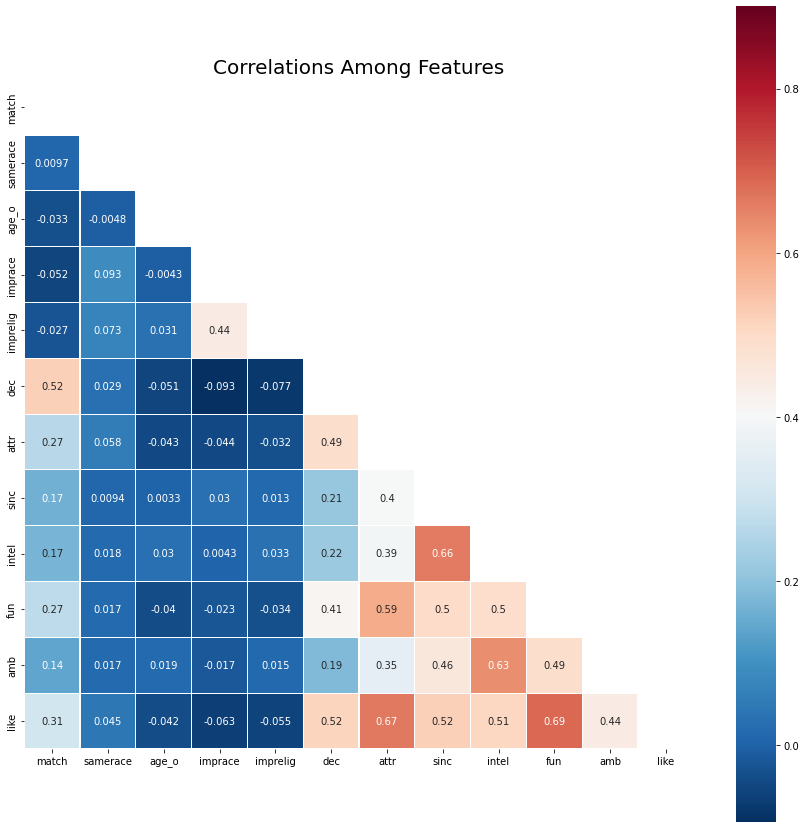

In [ ]:
corr_columns = [
'gender',
'match',
'samerace',
'age_o',
'race_o',
'imprace',
'imprelig',
'dec',
'attr',
'sinc',
'intel',
'fun',
'amb',
'like',
]

data_corr = df[corr_columns]

mask = np.zeros_like(data_corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,15))
sns.heatmap (data_corr.corr(), 
             annot=True,
             mask = mask,
             cmap = 'RdBu_r',
             linewidths=0.1, 
             linecolor='white',
             vmax = .9,
             square=True)

plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

In [ ]:
cut_data = df
cut_data.drop_duplicates(subset='iid', inplace=True)

Test d’hypothèse: Y a-t-il une différence significative dans l’attractivité moyenne d’un partenaire qui a été choisi et d’un partenaire qui n’a pas été choisi?

In [ ]:
avg_attr_dec     = cut_data[cut_data['dec'] == 1]['attr'].mean()
avg_attr_not_dec = cut_data[cut_data['dec'] == 0]['attr'].mean()

print('The average attractiveness rating of the people who were chosen is: '     + str(avg_attr_dec    ))
print('The average attractiveness rating of the people who were not chosen is: ' + str(avg_attr_not_dec))

The average attractiveness rating of the people who were chosen is: 7.064220183486238
The average attractiveness rating of the people who were not chosen is: 5.17524115755627


* Hypothèse nulle : Il n’y a pas de différence entre l’attractivité d’un partenaire qui a été choisi et celui d’un partenaire qui n’a pas été choisi.
* Hypothèse alternative : Il y a une différence entre l’attractivité d’un partenaire qui a été choisi et d’un partenaire qui n’a pas été choisi 

In [ ]:
import scipy.stats as stats

stats.ttest_1samp(a = cut_data[cut_data['dec'] == 1]['attr'],
                 popmean = avg_attr_not_dec)

Ttest_1sampResult(statistic=16.89874423259212, pvalue=1.9087182676244177e-41)